<a href="https://colab.research.google.com/github/gagyeomkim/deepfake-defense-from-scratch/blob/seungeunlee/DDFS_WEEK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 이미지를 인식하는 원리

In [2]:
from tensorflow.keras.datasets import mnist
#keras 안의 data set -> mnist: 미국 국립표준기술원(NIST)에서 손글씨 숫자 이미지를 모아 만든 data set
#손글씨를 기계가 알아보는 것은 쉽지 않은 일 => 그것을 가능하게 하는 것이 CNN
#어떻게 기계가 인식을 해서 숫자를 알아볼 수 있을까?
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


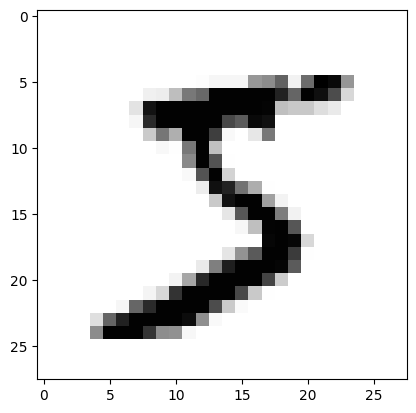

In [3]:
# 첫 번째 이미지 : 숫자 5
# 우리의 과제 : 숫자 5가 그림처럼 되어있기 때문에 컴퓨터가 읽을 수 있도록 해야함
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
# 이미지가 인식되는 원리
# 주어진 데이터를 출력하는 code
# 하얀색 바탕 0 255 검정색
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-4s" % i)
    sys.stdout.write('\n')
# 각각의 숫자가 속성에 대응되고, 속성들의 합이 5라고 판단하게 됨
# 28*28을 데이터 변형을 위해 2차원의 data set을 하나의 긴 line으로 만들어서 5라는 sample을 만들어야함

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

In [5]:
# 차원 변환 과정을 실습
X_train = X_train.reshape(X_train.shape[0], 784)
# reshape : 데이터 set을 2차원에서 1차원으로 바꿔주는 함수
# sample 숫자와 1차원으로 나열된 속성의 숫자를 인자로
X_train = X_train.astype('float64')
#실수로 먼저 바꾸고
# 원래 숫자(0~255)를 0~1로 바꿔주는 역할 => normalizazing(값을 255로 나눠준다)
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))
# class 5라고 출력됨

# 바이너리화 과정을 실습
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# 첫번째 code에서 불러온 것
print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


2. 딥러닝 기본 프레임 만들기

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옴
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누기
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정(추가된 부분)
model = Sequential()
# sequential 함수로 층 쌓기
model.add(Dense(512, input_dim=784, activation='relu'))
# 28*28 = 784를 input 값으로 하며, 은닉층의 node의 수를 512개로 진행함
model.add(Dense(10, activation='softmax'))
# 출력되는 값을 0~9인 10개의 값으로 output을 지정
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 모델 실행 환경을 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간
# model이 어디에 저장될지, val_loss값을 보며 monitor
# EarlyStopping : 10번 이상 나아지지 않으면 멈출 수 있도록
modelpath="./MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행
# 60, 20, 20
# 30번 반복, size는 200, 실행과정 보여주지 않음, 저장만 보여줌
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력
# 최종 값 알아보기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18527, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18527 to 0.13296, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13296 to 0.11241, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11241 to 0.09676, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.09676 to 0.09538, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09538 to 0.08836, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss improved from 0.08836 to 0.08453, saving model to ./MNIST_MLP.keras

Epoch 8: val_loss improved from 0.08453 to 0.08421, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss improved from 0.08421 to 0.08400, saving model to ./MNIST_MLP.keras

Epoch 10: val_loss did not improve from 0.08400

Epoch 11: val_loss did not improve from 0.08400

Epoch 12: val_loss did not improve from 0.08400

Epoch 13: val_loss did not improve from 0.08400

Epoch 14: val_loss did n

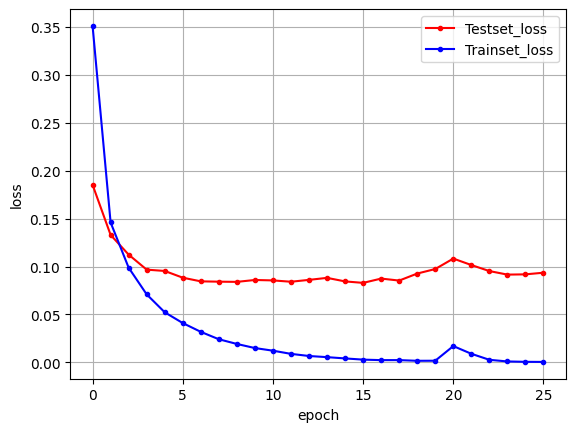

In [8]:
# 위를 그래프로 보여주는 것
# 학습 set의 오차가 점점 작아지지만 좋아지지 않게 유지될 때 멈추도록 함
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

5. 컨볼루션 신경망 실행하기

* 이미지 사이즈가 커질 경우 컴퓨터 자원을 많이 사용하고 시간이 오래걸리며 정확도가 떨어지는 연산을 하게됨 / 과적합 발생
* => 해결 : 컨볼루션 신경망
* 일부만 추출해서 마지막 레이어(fully connected layer)로 보내는 것

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# Conv2D 함수 불러옴 -> kernel size 결정, input 값을 28*28, 1 : 해당 이미지가 흑백
# 이 과정을 몇번 반복할지 : 32
model.add(MaxPooling2D(pool_size=(2,2)))
# maxpooling : 2*2인 pooling창을 만들어서(구역을 나누어서) 가장 큰 값 추출, 불필요한 정보 간추림
model.add(Dropout(0.25))
# Dropout : 일부 노드만 가져와서 사용, 25%의 노드를 꺼준다
model.add(Flatten())
# Flatten : 지금까지 2D로 진행했기 때문에 1D로 바꾸어줘야 함
model.add(Dense(128,  activation='relu'))
# 128개의 은닉층, relu 함수
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# 컨볼루션 신경망 완성

# 모델의 실행 옵션을 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간
modelpath="./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 0.08344, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08344 to 0.06071, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.06071 to 0.04954, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.04954 to 0.04679, saving model to ./MNIST_CNN.keras

Epoch 5: val_loss improved from 0.04679 to 0.04671, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss improved from 0.04671 to 0.04462, saving model to ./MNIST_CNN.keras

Epoch 7: val_loss improved from 0.04462 to 0.04443, saving model to ./MNIST_CNN.keras

Epoch 8: val_loss improved from 0.04443 to 0.04076, saving model to ./MNIST_CNN.keras

Epoch 9: val_loss did not improve from 0.04076

Epoch 10: val_loss did not improve from 0.04076

Epoch 11: val_loss did not improve from 0.04076

Epoch 12: val_loss improved from 0.04076 to 0.03952, saving model to ./MNIST_CNN.keras

Epoch 13: val_loss did not improve from 0.03952

Epoch 14: val_loss did n